In [38]:
import os 
from datetime import datetime
import ubiops
from dotenv import load_dotenv

import matplotlib.pyplot as plt
from matplotlib import colormaps
import numpy as np
import xarray as xr
import utils


In [39]:
# Enter your API token here
load_dotenv(".env")

client = ubiops.ApiClient(ubiops.Configuration(
	host="https://api.ubiops.com/v2.1",
	api_key={"Authorization": os.environ["TOKEN_RAYCAST_USER"]})
)

api = ubiops.CoreApi(client)


In [41]:

ref_datetime = datetime.strptime("2024-06-20 07:30:00", "%Y-%m-%d %H:%M:%S")

# request
utils.raycast_data_by_query(token=os.environ["TOKEN_RAYCAST_USER"], ref_datetime=ref_datetime)

ds = xr.open_dataset(f"irradiance_{ref_datetime.strftime('%Y%m%dT%H%M%S')}.nc", engine="netcdf4")

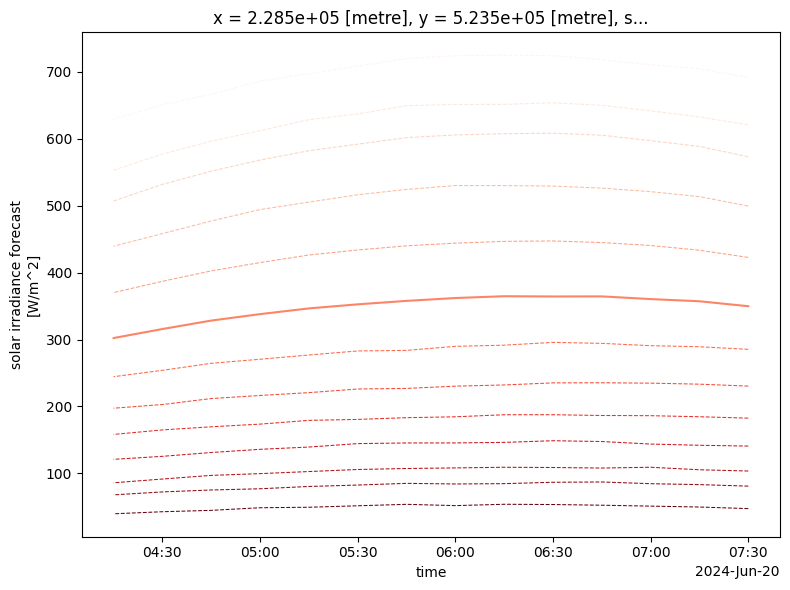

In [42]:


fig, ax = plt.subplots(1,1,figsize=(8,6))

# Get 13 colors from the "Reds" colormap
cmap = colormaps.get_cmap('Reds')
colors = [cmap(i) for i in np.linspace(0, 1, 13)] 

for i in range(13):
    if i == 5:
        ds.isel(x=100, y=100, quantile=i)['irradiance'].plot(ax=ax, color=colors[i], label=f'Quantile {i}', linewidth=1.5)
    else:
        ds.isel(x=100, y=100, quantile=i)['irradiance'].plot(ax=ax, color=colors[i], label=f'Quantile {i}', linewidth=0.75, linestyle='--')

plt.tight_layout()
